In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

In [2]:
# Read the train.csv

df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
# Read the test.csv

df_test = pd.read_csv('test.csv')

In [5]:
# df_train info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


from 230130 data there are 8,871 null data in the train datasets. we need to do data skimming to further check the dataset

In [6]:
# df_test info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


overall the datasets is clean, but we need to make sure that the datasets is squeaky clean

In [7]:
# Data skimming

def data_skimming(df):
    skimmed_data = pd.DataFrame({
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'null_value(%)': df.isna().mean().values * 100,
        'neg_value(%)': [len(df[df[col] < 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        '0_value(%)': [len(df[df[col] == 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        'duplicate': df.duplicated().sum(),
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].dropna().unique()[:5] for col in df.columns]  # Limited to 5 unique values for better visibility
    })
    
    return skimmed_data.round(3)

In [8]:
# df_train skimming

train_skimming = data_skimming(df_train)
train_skimming

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,id,int64,0.000,0.0,0.0,0,230130,"[0, 1, 2, 3, 4]"
1,date,object,0.000,0.0,0.0,0,2557,"[2010-01-01, 2010-01-02, 2010-01-03, 2010-01-0..."
2,country,object,0.000,0.0,0.0,0,6,"[Canada, Finland, Italy, Kenya, Norway]"
3,store,object,0.000,0.0,0.0,0,3,"[Discount Stickers, Stickers for Less, Premium..."
4,product,object,0.000,0.0,0.0,0,5,"[Holographic Goose, Kaggle, Kaggle Tiers, Kern..."
5,num_sold,float64,3.855,0.0,0.0,0,4037,"[973.0, 906.0, 423.0, 491.0, 300.0]"


As we can see from the skimming report above that in the num sold there are 3.8 % of null value in the data, we need to deep dive into the null data and make a decision on what to do

In [9]:
# df_test skimming

test_skimming = data_skimming(df_test)
test_skimming

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,id,int64,0.0,0.0,0.0,0,98550,"[230130, 230131, 230132, 230133, 230134]"
1,date,object,0.0,0.0,0.0,0,1095,"[2017-01-01, 2017-01-02, 2017-01-03, 2017-01-0..."
2,country,object,0.0,0.0,0.0,0,6,"[Canada, Finland, Italy, Kenya, Norway]"
3,store,object,0.0,0.0,0.0,0,3,"[Discount Stickers, Stickers for Less, Premium..."
4,product,object,0.0,0.0,0.0,0,5,"[Holographic Goose, Kaggle, Kaggle Tiers, Kern..."


After skimming we can see that the test datasets is squeaky clean.

Now, lets tackle the null value in the train datasets. Since it contain around 3.8 % of null value

In [10]:
# Filtering the null value
df_train[df_train['num_sold'].isna()]

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN
...,...,...,...,...,...,...
229905,229905,2016-12-29,Kenya,Discount Stickers,Holographic Goose,NaN
229950,229950,2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN
229995,229995,2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN
230040,230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NaN


from the filtered null value, several hypotesis came up :

    1. The null value means zero sales
    2. The null value means missing in data imputation

In [11]:
# Filtering the zero value to test the hypotesis

df_train[df_train['num_sold'] == 0]

,id,date,country,store,product,num_sold


After checking the first hypotesis, we can safely conclude that the null value is meaning that the product have zero / 0 sales. <br>
So we need to drop the missing values

In [12]:
# Dropping the missing values

df_train = df_train.dropna()

In [13]:
# Feature engineering

df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['weekday'] = df_train['date'].dt.weekday

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['weekday'] = df_test['date'].dt.weekday

In the feature engineering, we need to split the date into year, month, day, and is it weekday or no <br>
also we need to change it from the original dtype (object) into (datetime)

In [14]:
# Concatenate Train and Test: To ensure consistent preprocessing.

df_train['is_train'] = 1
df_test['is_train'] = 0
df_test['num_sold'] = np.nan  # Add the target column to the test set for consistency
full_data = pd.concat([df_train, df_test], axis=0)

In this step we concatenating the train and test datasets before preprocessing ensures that both datasets undergo the same transformations, which is critical for maintaining consistency in machine learning workflows.

## Feature Engineering

In [15]:
# Encode categorical data

from sklearn.preprocessing import LabelEncoder
for col in ['country', 'store', 'product']:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col])

This step ensures that the categorical data is converted into a format suitable for further preprocessing and model training.

In [16]:
# Splitting datasets into train and test set

train = full_data[full_data['is_train'] == 1].drop(columns=['is_train'])
test = full_data[full_data['is_train'] == 0].drop(columns=['is_train', 'num_sold'])

In this step we split the datasets again, into the train and test

# Define the Target and Features

In [17]:
# Defining Target and Features

X = train.drop(columns=['id', 'date', 'num_sold'])
y = train['num_sold']
X_test = test.drop(columns=['id', 'date'])

In [18]:
# Split Train Dataset into Train and Validation Sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Modelling

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [20]:
# Prediction

y_pred = model.predict(X_val)

In [21]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

mape = mean_absolute_percentage_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MAPE: {mape}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAPE: 1.850455687206424
MAE: 116.14164044261146
R²: 0.9319226739207511


Metrics Explanation:
- MAPE (Mean Absolute Percentage Error): 1.85

    - On average, the model's predictions are off by 185% of the actual values. This indicates that the model's relative error is quite high, suggesting significant room for improvement.

- MAE (Mean Absolute Error): 116.14

    - The model's average error in predicting the target (num_sold) is 116 units. While MAE doesn't consider the scale of predictions, it provides a straightforward measure of error magnitude.

- R² (R-Squared): 0.9319

    - The model explains 93.19% of the variance in the target variable.

In [22]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.05, 0.15),
}

random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of combinations to test
    scoring='neg_mean_absolute_percentage_error',
    cv=3,
    random_state=42
)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print(random_search.best_params_)

{'learning_rate': 0.14149949866739314, 'max_depth': 6, 'n_estimators': 274}


In [23]:
# Train the model with best parameter

train_predictions = best_model.predict(X_train)

In [24]:
# Mean Absolute Percentage Error (MAPE)

mape = mean_absolute_percentage_error(y_train, train_predictions)

# Mean Absolute Error (MAE)

mae = mean_absolute_error(y_train, train_predictions)

# R-squared (R²)

r2 = r2_score(y_train, train_predictions)

# Print Results

print(f"Train Metrics:")
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Train Metrics:
MAPE: 0.2374
MAE: 37.5486
R²: 0.9922


Metrics Explanation:
- MAPE (Mean Absolute Percentage Error): 0.2374

    - This indicates that, on average, the model's predictions are off by 23.74% of the actual values on the training set.

- MAE (Mean Absolute Error): 37.5486

    - On average, the model's predictions differ from the actual values by 37.55 units. This gives an idea of the scale of error in the same unit as the target variable (num_sold).

- R² (R-Squared): 0.9922

    - The model explains 99.22% of the variance in the target variable in the training data. This is an excellent fit, suggesting the model captures most of the variability in the training set.

Key Insights:
The low MAPE and MAE combined with a high R² value suggest that the model performs very well on the training data. <br>
However, the performance on the validation/test data should also be checked to ensure that the model generalizes well and is not overfitting.

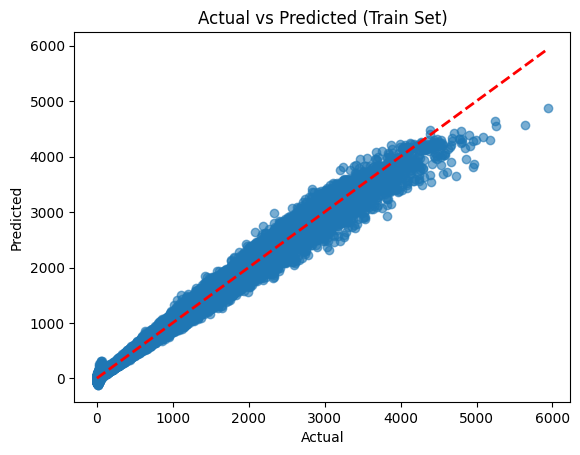

In [25]:
# Plotting Actual vs Predicted Train Set

import matplotlib.pyplot as plt

plt.scatter(y_train, train_predictions, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Train Set)')
plt.show()


Interpretation

1. Closeness to the Red Line <br>
The blue dots cluster tightly around the red dashed line, indicating that the predictions are very close to the actual values for most observations in the training data.

2. Spread <br>
At higher values of the actual target (e.g., >4000), the spread seems slightly wider. This may suggest that the model has relatively higher errors for larger targets but performs consistently well for the majority of the data points.

3. Linear Trend <br>
The linear alignment reflects that the model captures the underlying relationship between the features and the target variable effectively.


In [26]:
# Predict on the validation set

val_predictions = best_model.predict(X_val)

In [27]:
# Calculate metrics

val_mape = mean_absolute_percentage_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# Print metrics

print(f"Validation Metrics:")
print(f"MAPE: {val_mape:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R²: {val_r2:.4f}")

Validation Metrics:
MAPE: 0.2419
MAE: 38.6949
R²: 0.9918


Validation Metrics

- MAPE (Mean Absolute Percentage Error): 0.2419  
  Indicates the model's average percentage error on the validation set. A lower MAPE reflects better predictive performance.

- MAE (Mean Absolute Error): 38.6949  
  Represents the average absolute difference between the predicted and actual values. A lower MAE suggests better accuracy.

- R² (Coefficient of Determination): 0.9918  
  Shows how well the model explains the variance in the target variable. An R² value close to 1 indicates a strong fit to the data.

In [56]:
# Predict on the test set

test_predictions = best_model.predict(X_test)

In [57]:
# Create a DataFrame to store the results

submission = pd.DataFrame({
    'id': test['id'],  # Use the 'id' column from the test dataset
    'num_sold': test_predictions  # Use the predictions generated by the model
})

In [61]:
# Display the first few rows of predictions

print(submission.head())

       id    num_sold
0  230130  140.031199
1  230131  824.728934
2  230132  756.890198
3  230133  388.350385
4  230134  435.576540


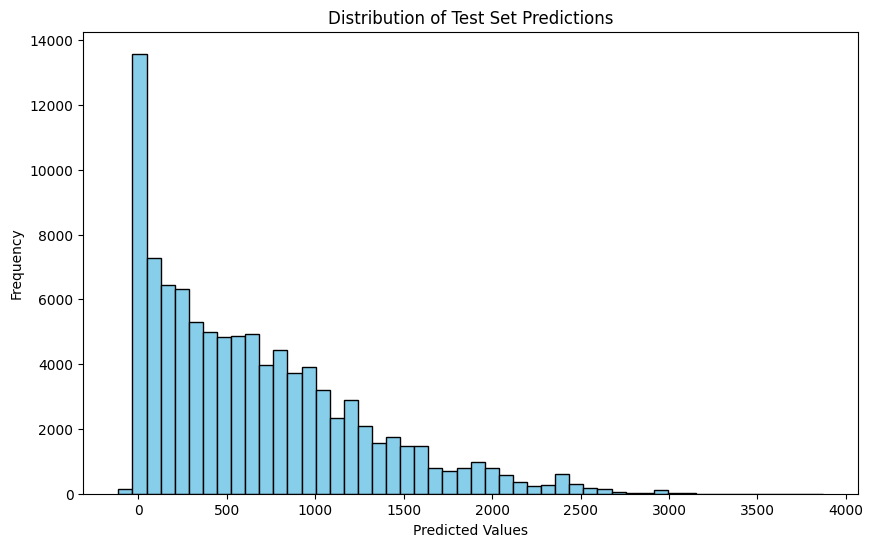

In [59]:
# Plotting Test Set Distribution

plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Test Set Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Save the submission DataFrame to a CSV file

submission.to_csv('submission_predictions.csv', index=False)